<a href="https://colab.research.google.com/github/Ayushraj6202/keras-tuner/blob/main/Keras_Tuner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Dropout
from tensorflow.keras import Sequential

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/DL/2/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
X=SS.fit_transform(X)

In [ ]:
X.shape

(768, 8)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
model=Sequential()
model.add(Dense(32,activation='relu',input_dim=8))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 425 (1.66 KB)
Trainable params: 425 (1.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,Y_train,batch_size=32,validation_data=(X_test,Y_test),epochs=100)

Epoch 1/100
20/20 [==============================] - 3s 15ms/step - loss: 0.6957 - accuracy: 0.5554 - val_loss: 0.6942 - val_accuracy: 0.6299
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6709 - accuracy: 0.6645 - val_loss: 0.6731 - val_accuracy: 0.7013
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6545 - accuracy: 0.7101 - val_loss: 0.6554 - val_accuracy: 0.7468
Epoch 4/100
20/20 [==============================] - 0s 8ms/step - loss: 0.6385 - accuracy: 0.7264 - val_loss: 0.6350 - val_accuracy: 0.7727
Epoch 5/100
20/20 [==============================] - 0s 7ms/step - loss: 0.6189 - accuracy: 0.7557 - val_loss: 0.6142 - val_accuracy: 0.7922
Epoch 6/100
20/20 [==============================] - 0s 8ms/step - loss: 0.5983 - accuracy: 0.7655 - val_loss: 0.5926 - val_accuracy: 0.8052
Epoch 7/100
20/20 [==============================] - 0s 7ms/step - loss: 0.5776 - accuracy: 0.7655 - val_loss: 0.5726 - val_accuracy: 0.7987
Epoch 8/100


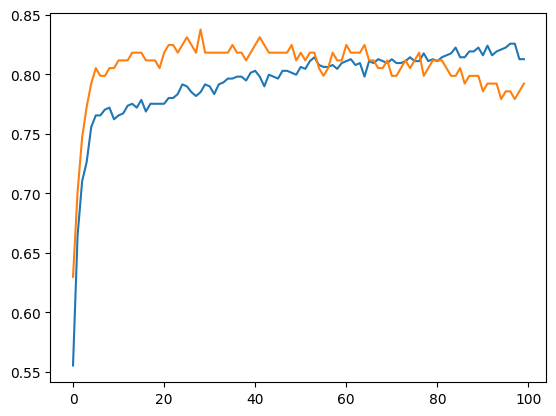

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.3 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

#Find best Optimizers

In [ ]:
def build_model(hp):
    model=Sequential()
    model.add(Dense(32,activation='relu',input_dim=8))
    model.add(Dense(1,activation='sigmoid'))

    option=hp.Choice('optimizer',values=['sgd','adam','adagrad','rmsprop'])

    model.compile(optimizer=option,loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
tuner = kt.RandomSearch(build_model,max_trials=8,objective='val_accuracy')

In [ ]:
tuner.search(X_train,Y_train,epochs=10,validation_data=(X_test,Y_test))

Trial 4 Complete [00h 00m 02s]
val_accuracy: 0.7922077775001526

Best val_accuracy So Far: 0.8376623392105103
Total elapsed time: 00h 00m 13s


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [ ]:
best_model=tuner.get_best_models(num_models=1)[0]

In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# best_model.get_weights()[0]

Now train best model for more epochs


In [ ]:
history=best_model.fit(X_train,Y_train,epochs=100,initial_epoch=11,validation_data=(X_test,Y_test))

Epoch 12/100
20/20 [==============================] - 1s 27ms/step - loss: 0.5062 - accuracy: 0.7622 - val_loss: 0.4648 - val_accuracy: 0.8377
Epoch 13/100
20/20 [==============================] - 0s 11ms/step - loss: 0.4995 - accuracy: 0.7638 - val_loss: 0.4569 - val_accuracy: 0.8377
Epoch 14/100
20/20 [==============================] - 0s 15ms/step - loss: 0.4940 - accuracy: 0.7655 - val_loss: 0.4524 - val_accuracy: 0.8377
Epoch 15/100
20/20 [==============================] - 0s 11ms/step - loss: 0.4896 - accuracy: 0.7590 - val_loss: 0.4459 - val_accuracy: 0.8442
Epoch 16/100
20/20 [==============================] - 0s 14ms/step - loss: 0.4858 - accuracy: 0.7622 - val_loss: 0.4421 - val_accuracy: 0.8377
Epoch 17/100
20/20 [==============================] - 0s 11ms/step - loss: 0.4831 - accuracy: 0.7638 - val_loss: 0.4392 - val_accuracy: 0.8442
Epoch 18/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4804 - accuracy: 0.7671 - val_loss: 0.4368 - val_accuracy: 0.8377


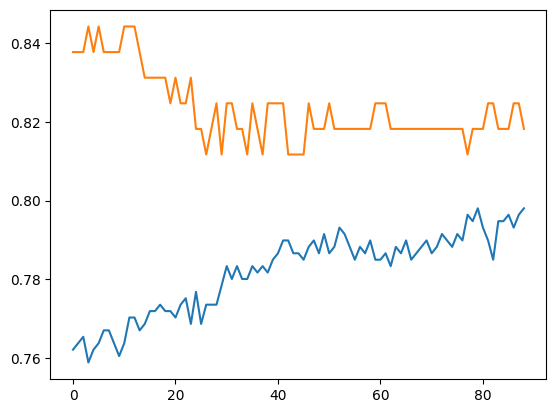

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

#Find Number of neuron in layers

In [ ]:
def build_model(hp):
    model=Sequential()
    unit=hp.Int('units', min_value=8,max_value=128);
    model.add(Dense(units=unit,activation='relu',input_dim=8))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
tuner_1=kt.RandomSearch(build_model,
                        max_trials=5,
                        objective='val_accuracy',
                        directory='mydir',
                        project_name='ayush')

In [ ]:
tuner_1.search(X_train,Y_train,epochs=10,validation_data=(X_test,Y_test))

Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.8181818127632141

Best val_accuracy So Far: 0.8246753215789795
Total elapsed time: 00h 00m 21s


In [ ]:
tuner_1.get_best_hyperparameters()[0].values

{'units': 124}

In [ ]:
model_1=tuner_1.get_best_models(num_models=1)[0]

In [ ]:
model_1.fit(X_train,Y_train,epochs=100,initial_epoch=11,validation_data=(X_test,Y_test))

Epoch 12/100
20/20 [==============================] - 1s 11ms/step - loss: 0.4639 - accuracy: 0.7671 - val_loss: 0.4198 - val_accuracy: 0.8247
Epoch 13/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4627 - accuracy: 0.7671 - val_loss: 0.4168 - val_accuracy: 0.8312
Epoch 14/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4581 - accuracy: 0.7704 - val_loss: 0.4201 - val_accuracy: 0.8182
Epoch 15/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4565 - accuracy: 0.7752 - val_loss: 0.4203 - val_accuracy: 0.8247
Epoch 16/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4551 - accuracy: 0.7720 - val_loss: 0.4179 - val_accuracy: 0.8247
Epoch 17/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4526 - accuracy: 0.7671 - val_loss: 0.4161 - val_accuracy: 0.8182
Epoch 18/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4513 - accuracy: 0.7736 - val_loss: 0.4180 - val_accuracy: 0.8052
Epoch

##Num of layers

In [ ]:
def build_model(hp):
    model=Sequential()
    model.add(Dense(128,activation='relu',input_dim=8))

    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
        model.add(Dense(128,activation='relu'))
        model.add(Dropout(0.2))

    model.add(Dense(1,activation='sigmoid'))

    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [ ]:
tuner=kt.RandomSearch(build_model,max_trials=3,objective='val_accuracy',directory='mydir',project_name='ayush1')

In [ ]:
tuner.search(X_train,Y_train,epochs=5,validation_data=(X_test,Y_test));

Trial 3 Complete [00h 00m 04s]
val_accuracy: 0.8181818127632141

Best val_accuracy So Far: 0.8246753215789795
Total elapsed time: 00h 00m 14s


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 3}

In [ ]:
model=tuner.get_best_models(num_models=1)[0]

In [ ]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,initial_epoch=6)

Epoch 7/100
20/20 [==============================] - 2s 15ms/step - loss: 0.4545 - accuracy: 0.7736 - val_loss: 0.4508 - val_accuracy: 0.7662
Epoch 8/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4550 - accuracy: 0.7932 - val_loss: 0.4343 - val_accuracy: 0.8052
Epoch 9/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4337 - accuracy: 0.7948 - val_loss: 0.4758 - val_accuracy: 0.7662
Epoch 10/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4451 - accuracy: 0.7915 - val_loss: 0.4423 - val_accuracy: 0.8052
Epoch 11/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4298 - accuracy: 0.7883 - val_loss: 0.4538 - val_accuracy: 0.7987
Epoch 12/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4292 - accuracy: 0.8029 - val_loss: 0.4657 - val_accuracy: 0.7857
Epoch 13/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4141 - accuracy: 0.8094 - val_loss: 0.4659 - val_accuracy: 0.7792
Epoch 14

##All Parameter finding

In [119]:
def build_model (hp):
    model=Sequential()
    cnt=0
    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
        if cnt==0:
            model.add(
                Dense(
                units=hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                activation=hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid']),
                input_dim=8
                     )
            )
            model.add(Dropout(hp.Choice('Dropout'+str(i),values=[.1,.2,.3,.4,.5,.6])))
        else :
            model.add(
                Dense(
                units=hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                activation=hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid']),
                     )
            )
            model.add(Dropout(hp.Choice('Dropout'+str(i),values=[.1,.2,.3,.4,.5,.6])))
        cnt+=1
    model.add(Dense(1,activation='sigmoid'))

    model.compile(loss='binary_crossentropy',optimizer=hp.Choice('optimizer',values=['rmsprop','adm','adagrad','sgd','nadam']),metrics = ['accuracy'])

    return model

In [120]:
tuner = kt.RandomSearch(build_model,max_trials=5,objective='val_accuracy',directory='mydir1',project_name='ayush11')

In [121]:
tuner.search(X_train,Y_train,epochs=4,validation_data=(X_test,Y_test))

Trial 5 Complete [00h 00m 04s]
val_accuracy: 0.6948052048683167

Best val_accuracy So Far: 0.7792207598686218
Total elapsed time: 00h 00m 24s


In [122]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 1,
 'units0': 96,
 'activation0': 'sigmoid',
 'Dropout0': 0.1,
 'optimizer': 'rmsprop',
 'units1': 48,
 'activation1': 'tanh',
 'Dropout1': 0.3,
 'units2': 56,
 'activation2': 'sigmoid',
 'Dropout2': 0.2,
 'units3': 16,
 'activation3': 'relu',
 'Dropout3': 0.2,
 'units4': 120,
 'activation4': 'relu',
 'Dropout4': 0.4,
 'units5': 32,
 'activation5': 'tanh',
 'Dropout5': 0.6,
 'units6': 32,
 'activation6': 'relu',
 'Dropout6': 0.6,
 'units7': 24,
 'activation7': 'relu',
 'Dropout7': 0.2,
 'units8': 88,
 'activation8': 'relu',
 'Dropout8': 0.1,
 'units9': 32,
 'activation9': 'tanh',
 'Dropout9': 0.3}

In [123]:
model=tuner.get_best_models(num_models=1)[0]

In [124]:
hist=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,initial_epoch=5)

Epoch 6/100
20/20 [==============================] - 1s 11ms/step - loss: 0.5573 - accuracy: 0.7215 - val_loss: 0.4993 - val_accuracy: 0.7857
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5431 - accuracy: 0.7280 - val_loss: 0.4839 - val_accuracy: 0.7792
Epoch 8/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5381 - accuracy: 0.7329 - val_loss: 0.4788 - val_accuracy: 0.7857
Epoch 9/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5275 - accuracy: 0.7394 - val_loss: 0.4662 - val_accuracy: 0.7857
Epoch 10/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5206 - accuracy: 0.7378 - val_loss: 0.4592 - val_accuracy: 0.7857
Epoch 11/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5055 - accuracy: 0.7476 - val_loss: 0.4532 - val_accuracy: 0.7987
Epoch 12/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5105 - accuracy: 0.7541 - val_loss: 0.4494 - val_accuracy: 0.8052
Epoch 13/

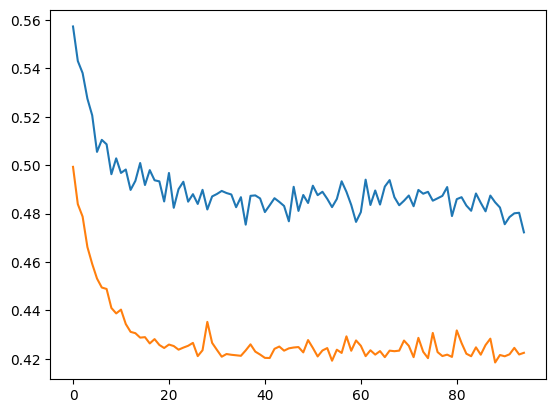

In [125]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

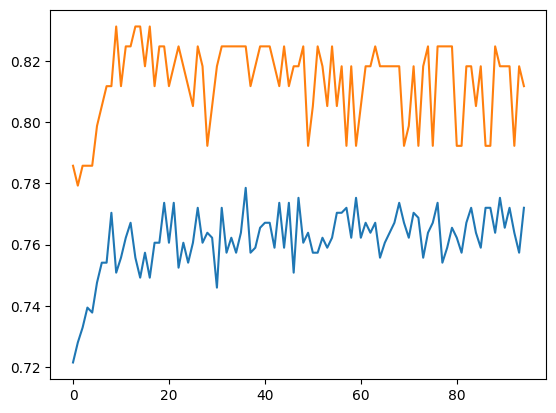

In [126]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])